In [1]:
using DrWatson
@quickactivate "RR-MAR"

In [3]:
using DataFrames, XLSX, CommonFeatures, Statistics, TensorToolbox, LinearAlgebra, Plots, Dates

datamatrix = XLSX.readdata(datadir("reguib_northcentral.xlsx"), "Sheet1!A2:S459");

nodates = Float64.(datamatrix[:, 2:end]);

unpermuted = reshape(nodates, (458, 2, 9));
tensordata = permutedims(unpermuted, (2, 3, 1));
matdata = tenmat(tensordata, col=3);

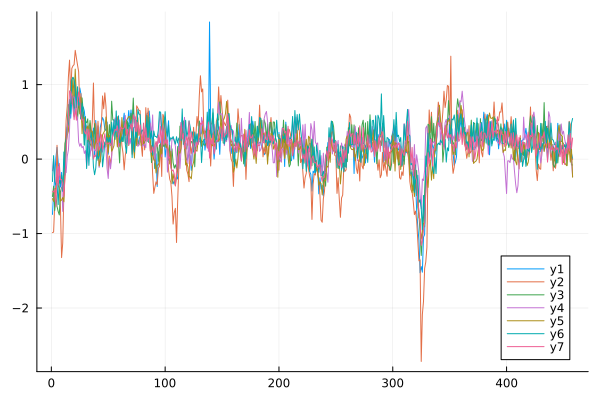

In [4]:
plot(tensordata[1,3:9, :]')

In [5]:
tucketa = 1e-02;
maxiter = 1000;
ϵ = 1e-03;
p = 1;
r = [2,9,2,9];
stdize = false;

In [9]:
tuckest = tuckerreg(tensordata, r; eta=tucketa, maxiter, p, ϵ, stdize);

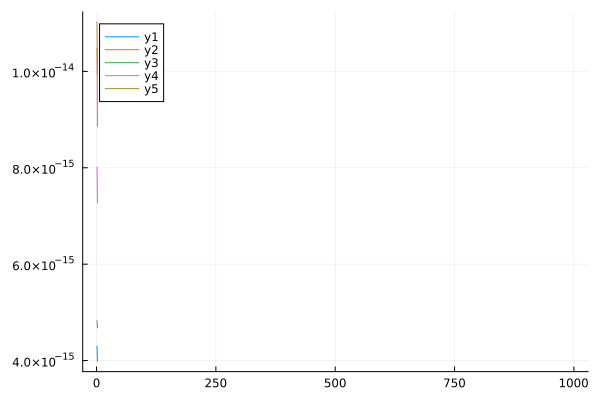

In [10]:
plot(tuckest.fullgrads)

# SCCF

- States go in the following order
- Iowa, Illinois, Indiana, Michigan, Minnesota, North Dakota, Ohio, South Dakota, Wisconsin
- Coincident, then Leading indicators

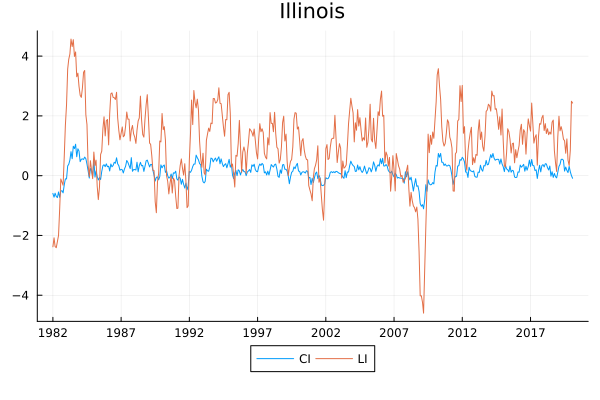

In [12]:
# Illinois
# Define date range
start_date = Date(1982, 1, 1)
end_date = Date(2020, 2, 1)
date_range = collect(start_date:Month(1):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:60:length(date_range)

# Format ticks as dates
plot(date_range, tensordata[1, 2, :], label = "CI", title = "Illinois", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, tensordata[2, 2, :], label = "LI")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("illinois.png")

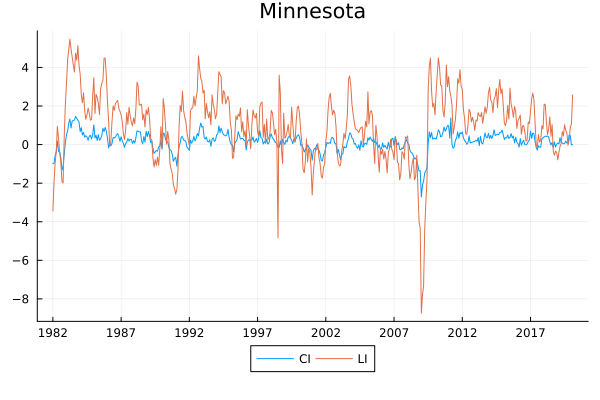

In [15]:
# Minnesota
# Define date range
start_date = Date(1982, 1, 1)
end_date = Date(2020, 2, 1)
date_range = collect(start_date:Month(1):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:60:length(date_range)

# Format ticks as dates
plot(date_range, tensordata[1, 4, :], label = "CI", title = "Minnesota", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, tensordata[2, 4, :], label = "LI")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("minnesota.png")

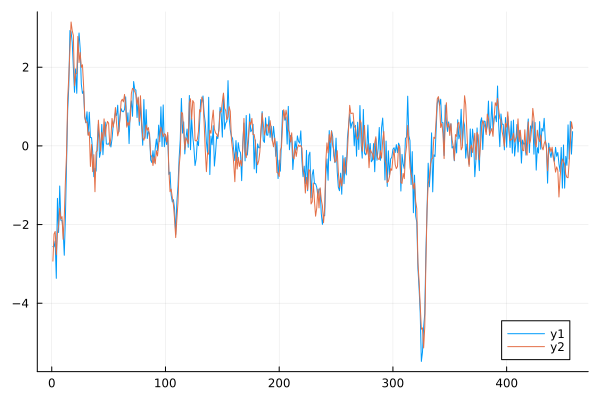

In [16]:
stddata = tensordata ./ std(tensordata, dims = 3);
cendata = stddata .- mean(stddata, dims = 3);
plot(cendata[1:2, 9, :]')

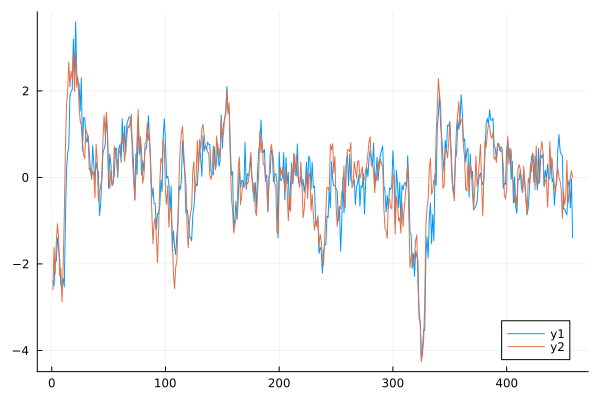

In [17]:
plot(cendata[1:2, 7, :]')

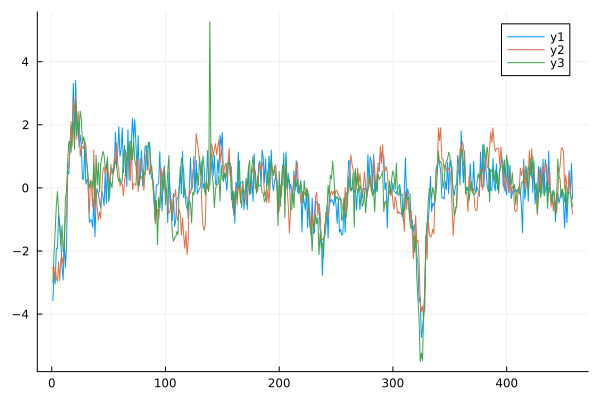

In [18]:
plot(cendata[1, 1:3, :]')